In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
easy = np.load('texts.v2.npz')

In [3]:
easy['texts'].shape
# 5837 5838 5896

(10015, 19, 57)

In [3]:
SKIPPED_DIR = './net/skipped/'
# tagged = os.listdir('./net/untagged_imgs/')
def skipped_file_gen():
    for file_name in os.listdir(SKIPPED_DIR):
        id = file_name.partition('.')[0]
        yield int(id)

file_gen = skipped_file_gen()

In [4]:
imid = next(file_gen)

3553


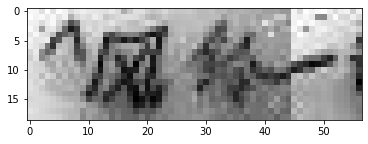

In [5]:
print(imid)
img = easy['texts'][imid]

plt.imshow(img, cmap='gray')

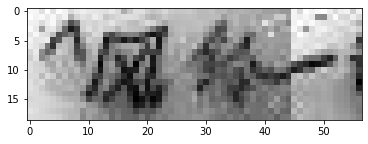

In [6]:
# text_img2 = cv2.GaussianBlur(img, (3,3), 1)
text_img2 = img
sobelY = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

plt.imshow(text_img2, cmap='gray')

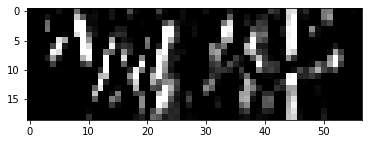

In [7]:
edges = cv2.filter2D(text_img2, -1, sobelY)
plt.imshow(edges, cmap='gray')

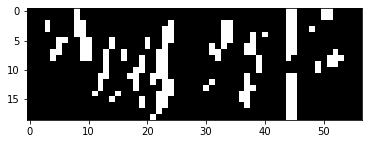

In [8]:
_, thres = cv2.threshold(edges, 0, 1, cv2.THRESH_OTSU)
plt.imshow(thres, cmap='gray')

[ 8 44 45]


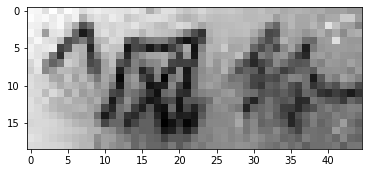

In [9]:
col_sum = np.sum(thres[:5, :], axis=0)
divides = np.argwhere(col_sum > 4).flatten()
print(divides)

# col = int(round(np.average(divides)))
col = np.max(divides)
res = img[:, :col]
plt.imshow(res, cmap='gray')

In [10]:
SAVE_DIR = 'net/untagged_imgs/'
cv2.imwrite(os.path.join(SAVE_DIR, "%05d.png"%(imid)), res)

True

In [545]:
def cropping_img(img):
    text_img2 = cv2.GaussianBlur(img, (3,3), 1)
    sobelY = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    edges = cv2.filter2D(text_img2, -1, sobelY)
    _, thres = cv2.threshold(edges, 0, 1, cv2.THRESH_OTSU)
    col_sum = np.sum(thres, axis=0)
    divides = np.argwhere(col_sum > 17).flatten()

    if len(divides) >= 1:
        col = int(round(np.average(divides)))
        res = img[:, :col]
    else:
        res = img
    return res

In [949]:
SAVE_DIR = 'net/untagged_img0/'

for i, img in enumerate(easy['texts']):
    res = cropping_img(img)
    cv2.imwrite(os.path.join(SAVE_DIR, "%05d.png"%(i)), img)

In [2]:
easier = np.load('texts.npz')

In [4]:
easier['labels'].shape

(11164,)

In [10]:
map_list = [15, 64, 65, 26, 48, 12, 27, 41, 22, 54, 9, 79, 45, 17, 8, 30, 44, 78, 34, 33, 69, 66, 28, 29, 2, 25, 4, 35, 51, 77, 39, 47, 31, 76, 62, 3, 63, 19, 71, 46, 50, 38, 43, 68, 75, 55, 13, 40, 1, 24, 42, 36, 58, 60, 53, 7, 52, 11, 23, 18, 5, 70, 16, 14, 73, 20, 67, 49, 0, 61, 6, 32, 72, 56, 37, 74, 57, 59, 21, 10]
DIR = 'net/tagged_imgs_org/'
for i, img in enumerate(easier['texts']):
    id = map_list[easier['labels'][i]]
    d = os.path.join(DIR, "%02d"%(id))
    if not os.path.exists(d):
        os.mkdir(d)
    cv2.imwrite(os.path.join(d, "%05d.png"%(20000+i)), img)